## Cyber Attack Data Exploration


In [ ]:
#importing all the necessary Python libraries and the dataset
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data=pd.read_csv("cybersecurity_attacks.csv")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2021-04-28 15:27:26,9.183.106.168,108.119.119.108,44392,3212,UDP,860,Data,DNS,Eius quas adipisci dicta. Tempora aspernatur e...,...,Ignored,High,Amira Bedi,Opera/9.61.(Windows NT 5.2; ar-IN) Presto/2.9....,Segment C,"Kochi, Telangana",NaN,NaN,NaN,Server
2344,2020-08-28 05:23:21,49.8.82.156,84.60.91.246,38941,45682,ICMP,308,Control,DNS,Quidem debitis officiis minus. Ullam dolorem r...,...,Logged,Medium,Fateh Kapoor,Opera/9.13.(X11; Linux i686; kw-GB) Presto/2.9...,Segment B,"Ujjain, Odisha",NaN,Log Data,NaN,Server
2345,2023-07-13 03:46:53,34.179.210.92,104.164.142.98,54875,12814,UDP,1126,Control,HTTP,Ea nobis culpa blanditiis expedita minima temp...,...,Blocked,Low,Yuvraj Vig,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_7;...,Segment B,"Ghaziabad, Meghalaya",NaN,Log Data,Alert Data,Firewall
2346,2020-02-28 05:01:36,129.73.142.165,64.182.219.85,2467,58445,UDP,701,Control,DNS,Aut voluptatum quisquam assumenda adipisci nul...,...,Ignored,Medium,Sumer Madan,Mozilla/5.0 (Linux; Android 4.2.2) AppleWebKit...,Segment B,"Bidhannagar, Haryana",19.168.11.10,NaN,Alert Data,Firewall


In [ ]:
# general information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 2020-01-31 to 2023-10-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attack Type  138 non-null    object
 1   value        138 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


## EDA(Exploratory data analysis)

In [ ]:
# View the first few rows of the dataset
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [ ]:
# View the last few rows of the dataset
data.tail()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
2343,2021-04-28 15:27:26,9.183.106.168,108.119.119.108,44392,3212,UDP,860,Data,DNS,Eius quas adipisci dicta. Tempora aspernatur e...,...,Ignored,High,Amira Bedi,Opera/9.61.(Windows NT 5.2; ar-IN) Presto/2.9....,Segment C,"Kochi, Telangana",NaN,NaN,NaN,Server
2344,2020-08-28 05:23:21,49.8.82.156,84.60.91.246,38941,45682,ICMP,308,Control,DNS,Quidem debitis officiis minus. Ullam dolorem r...,...,Logged,Medium,Fateh Kapoor,Opera/9.13.(X11; Linux i686; kw-GB) Presto/2.9...,Segment B,"Ujjain, Odisha",NaN,Log Data,NaN,Server
2345,2023-07-13 03:46:53,34.179.210.92,104.164.142.98,54875,12814,UDP,1126,Control,HTTP,Ea nobis culpa blanditiis expedita minima temp...,...,Blocked,Low,Yuvraj Vig,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_7;...,Segment B,"Ghaziabad, Meghalaya",NaN,Log Data,Alert Data,Firewall
2346,2020-02-28 05:01:36,129.73.142.165,64.182.219.85,2467,58445,UDP,701,Control,DNS,Aut voluptatum quisquam assumenda adipisci nul...,...,Ignored,Medium,Sumer Madan,Mozilla/5.0 (Linux; Android 4.2.2) AppleWebKit...,Segment B,"Bidhannagar, Haryana",19.168.11.10,NaN,Alert Data,Firewall
2347,2022-07-28 04:26:03,137.182.239.7,76.36.16.184,50124,5668,TCP,612,Data,FTP,Atque expedita corporis quis ratione. Illo arc...,...,Logged,Low,Ranbir Chandran,Opera/8.10.(X11; Linux i686; cmn-TW),NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# give the number of rows and columns
data.shape

(2348, 25)

In [ ]:
#give the number of rows
data.shape[0]

2348

In [ ]:
#give the number of columns
data.shape[1]

25

In [ ]:
# extract all columns of the dataset
data.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

## Data Cleaning

In [ ]:
# check for null values
data.isna().sum()

Timestamp                    0
Source IP Address            0
Destination IP Address       0
Source Port                  0
Destination Port             0
Protocol                     0
Packet Length                0
Packet Type                  0
Traffic Type                 0
Payload Data                 0
Malware Indicators        1176
Anomaly Scores               0
Alerts/Warnings           1187
Attack Type                  0
Attack Signature             0
Action Taken                 0
Severity Level               0
User Information             0
Device Information           0
Network Segment              1
Geo-location Data            1
Proxy Information         1148
Firewall Logs             1197
IDS/IPS Alerts            1163
Log Source                   1
dtype: int64

In [ ]:
data.isnull()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2344,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2345,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2346,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Source Port         0
Destination Port    0
Packet Length       0
Anomaly Scores      0
dtype: int64

In [ ]:
# calculate the mean , std, min, max and count of every attributes
data.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,2348.000000,2348.000000,2348.000000,2348.000000
mean,32314.992760,32838.227428,788.548552,50.104647
std,18781.241745,18571.544069,413.974742,28.932539
min,1031.000000,1030.000000,64.000000,0.060000
25%,15965.500000,17096.250000,428.750000,24.657500
50%,31733.000000,32502.000000,786.000000,50.520000
75%,48357.000000,49076.500000,1143.250000,75.160000
max,65521.000000,65535.000000,1500.000000,99.990000


In [ ]:
# Check for duplicate values
data.duplicated().sum()

0

In [ ]:
# Checking Skewness from 'Source Port' to 'Anomaly Scores'

df=data.loc[:,'Source Port':'Anomaly Scores']
df=df.select_dtypes([np.int, np.float])
for i, col in enumerate(df.columns):
    print("\nSkewness of "+col +" is", df[col].skew()) #measures skewness


Skewness of Source Port is 0.05946941104053445

Skewness of Destination Port is 0.03858148110055104

Skewness of Packet Length is -0.017914267379731216

Skewness of Anomaly Scores is -0.02083080381904235


In [ ]:
# Check unique values
data["Traffic Type"].unique()

array(['HTTP', 'DNS', 'FTP'], dtype=object)

In [ ]:
data["Attack Type"].unique()

array(['Malware', 'DDoS', 'Intrusion'], dtype=object)

<Axes: title={'center': 'Timestamp cyber attack by year'}, xlabel='Timestamp'>

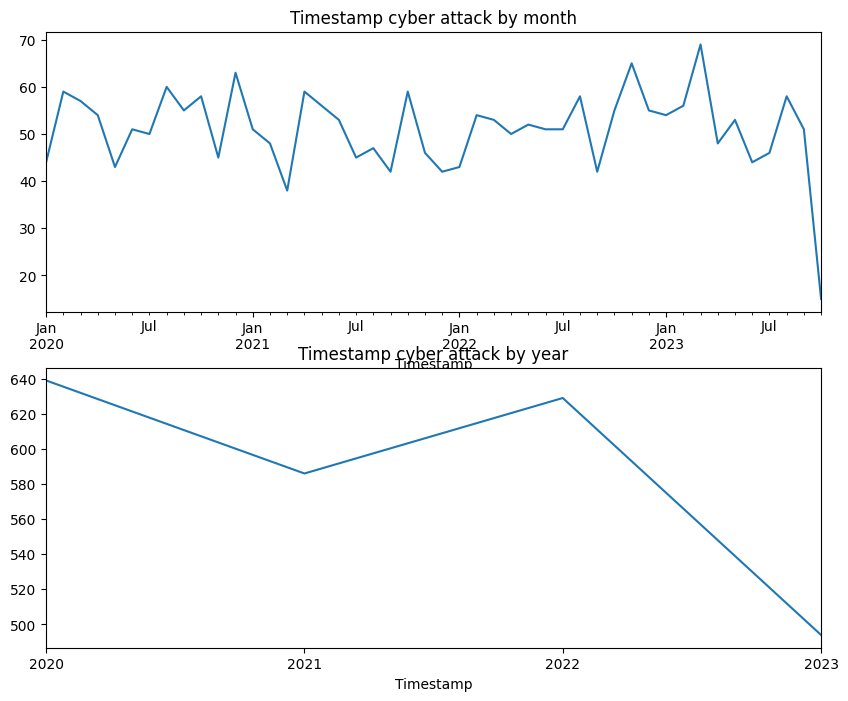

In [ ]:
# Assuming 'data' is your DataFrame and 'Timestamp' is the column containing timestamps
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

fig = plt.figure(figsize=(10, 8))
fig.add_subplot(211)
data.resample('M', on='Timestamp')['Attack Type'].count().plot(title='Timestamp cyber attack by month')


fig.add_subplot(212)
data.resample('Y', on='Timestamp')['Attack Type'].count().plot(title='Timestamp cyber attack by year')


In [ ]:
import plotly.express as px

data = pd.crosstab(data['Timestamp'], data['Attack Type']).resample('M').count().melt(ignore_index=False)
px.line(data, x=data.index, y='value', color='Attack Type', title='Attack Type by Month').show()

<Axes: title={'center': 'Time frequency by cyber attack'}, ylabel='Timestamp'>

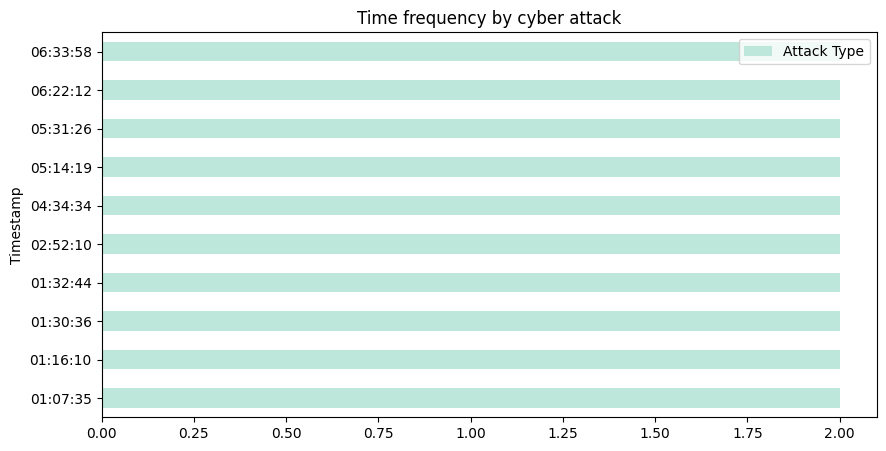

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.groupby(data['Timestamp'].dt.time).agg({'Attack Type': 'count'}).nlargest(10, 'Attack Type').plot(kind='barh', figsize=(10, 5), colormap='icefire', title='Time frequency by cyber attack')


array([[<Axes: title={'center': 'Anomaly Scores'}, xlabel='[Attack Type]'>,
        <Axes: title={'center': 'Destination Port'}, xlabel='[Attack Type]'>],
       [<Axes: title={'center': 'Packet Length'}, xlabel='[Attack Type]'>,
        <Axes: title={'center': 'Source Port'}, xlabel='[Attack Type]'>]],
      dtype=object)

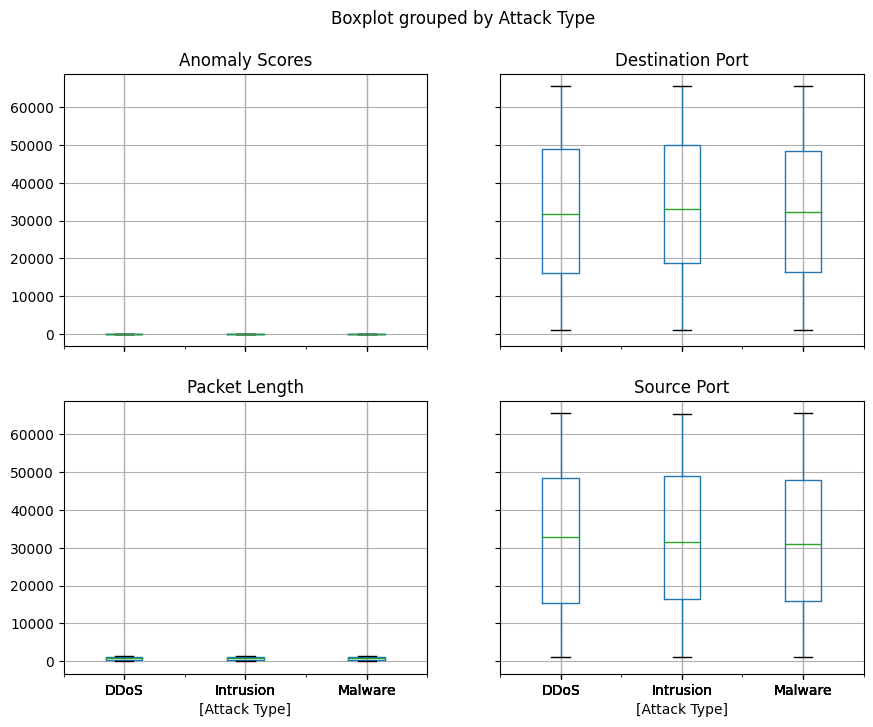

In [ ]:
data.boxplot(figsize=(10,8), by='Attack Type')


In [ ]:
px.scatter_3d(data, x='Source Port', y='Destination Port', z='Packet Length', color='Protocol').show()


<Axes: title={'center': 'Malware Attack by location'}, ylabel='Geo-location Data'>

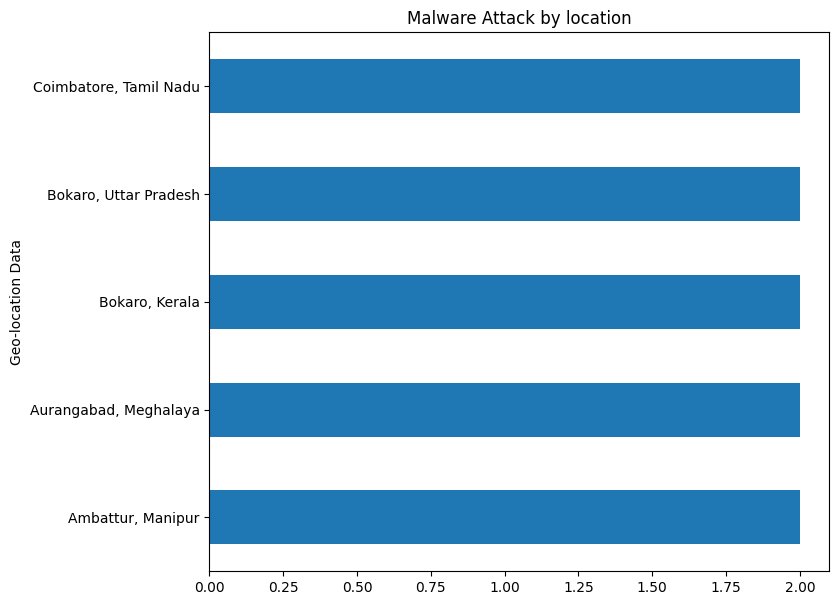

In [ ]:
pd.crosstab(data['Geo-location Data'], data['Attack Type']).nlargest(5, columns='Malware')['Malware'].plot(kind='barh',figsize=(8,7), title='Malware Attack by location')

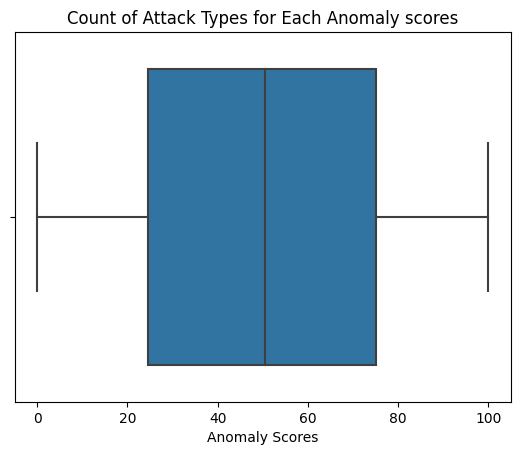

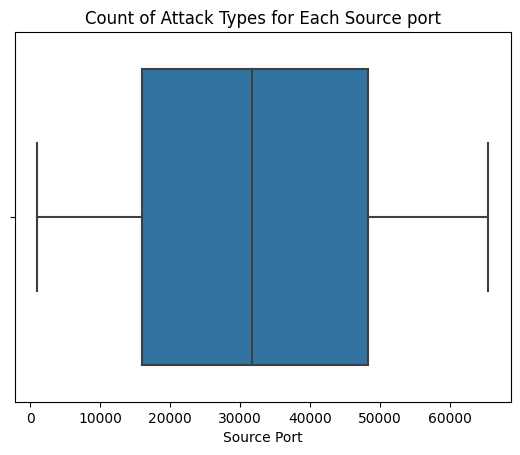

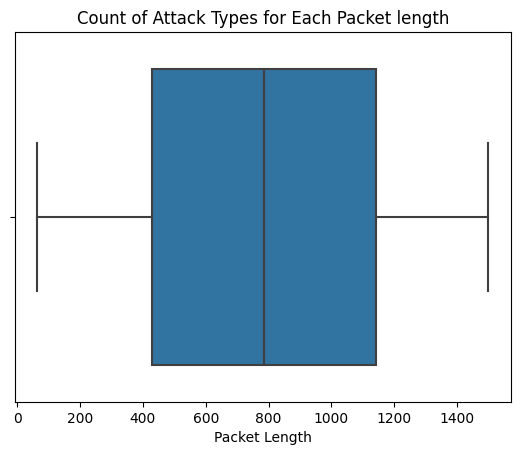

In [ ]:
columns = ['Anomaly Scores','Source Port','Packet Length']

for col in columns:
    sns.boxplot(data=data, x=col, hue='Attack Type')
    plt.title(f'Count of Attack Types for Each {col.capitalize()}')
    plt.show()

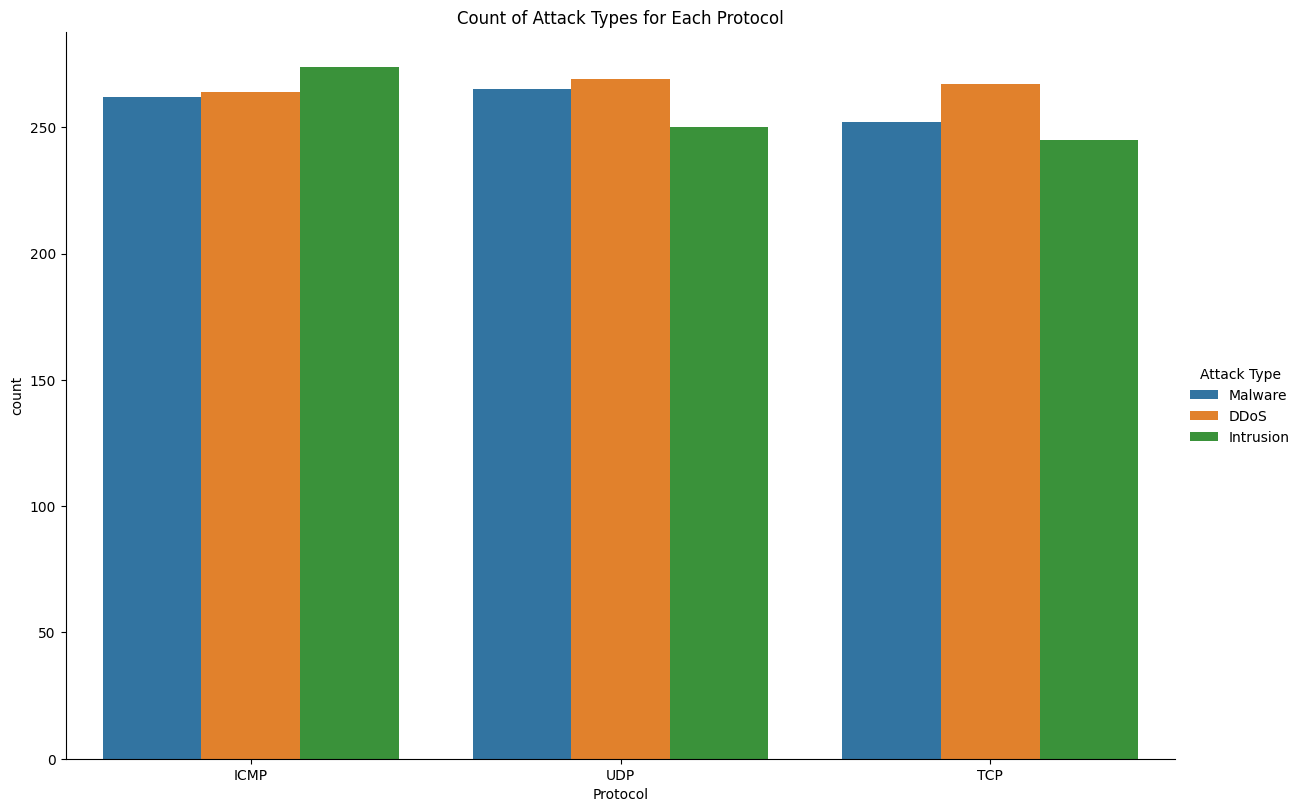

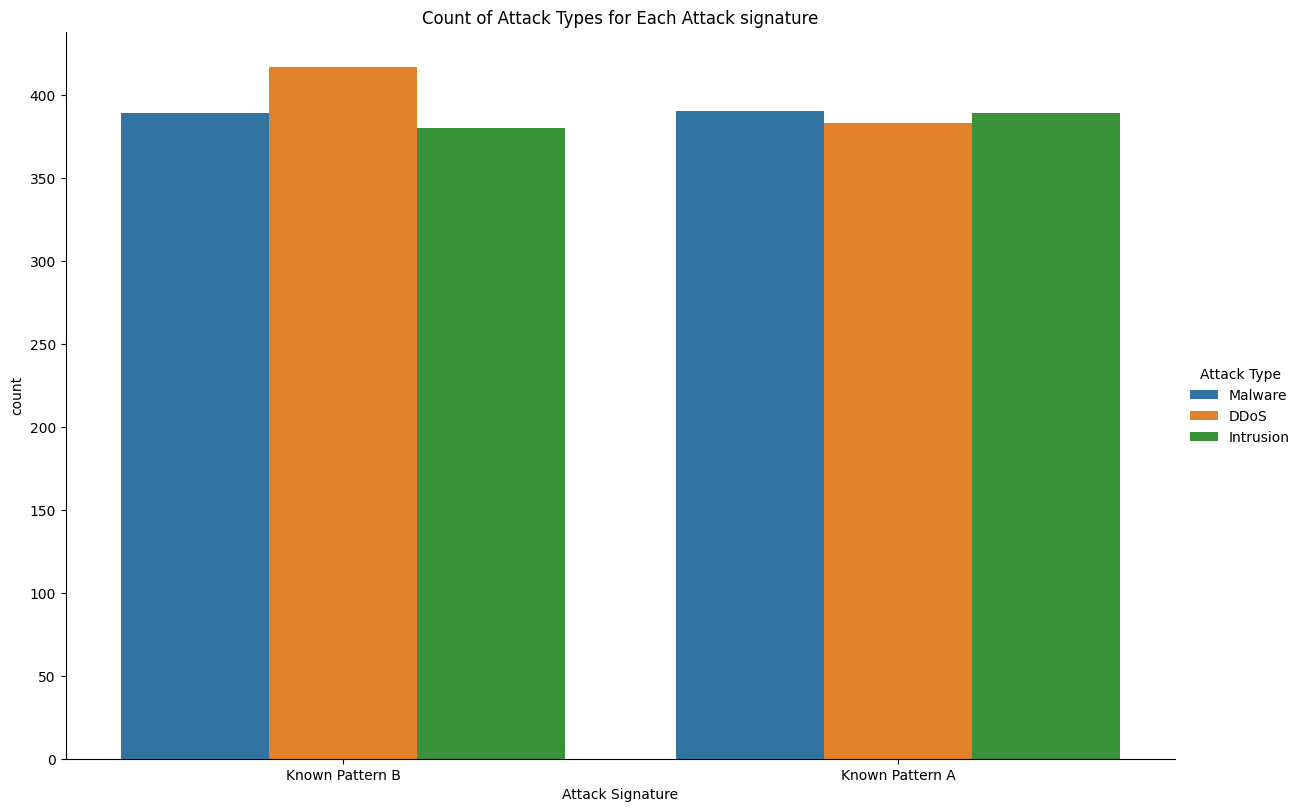

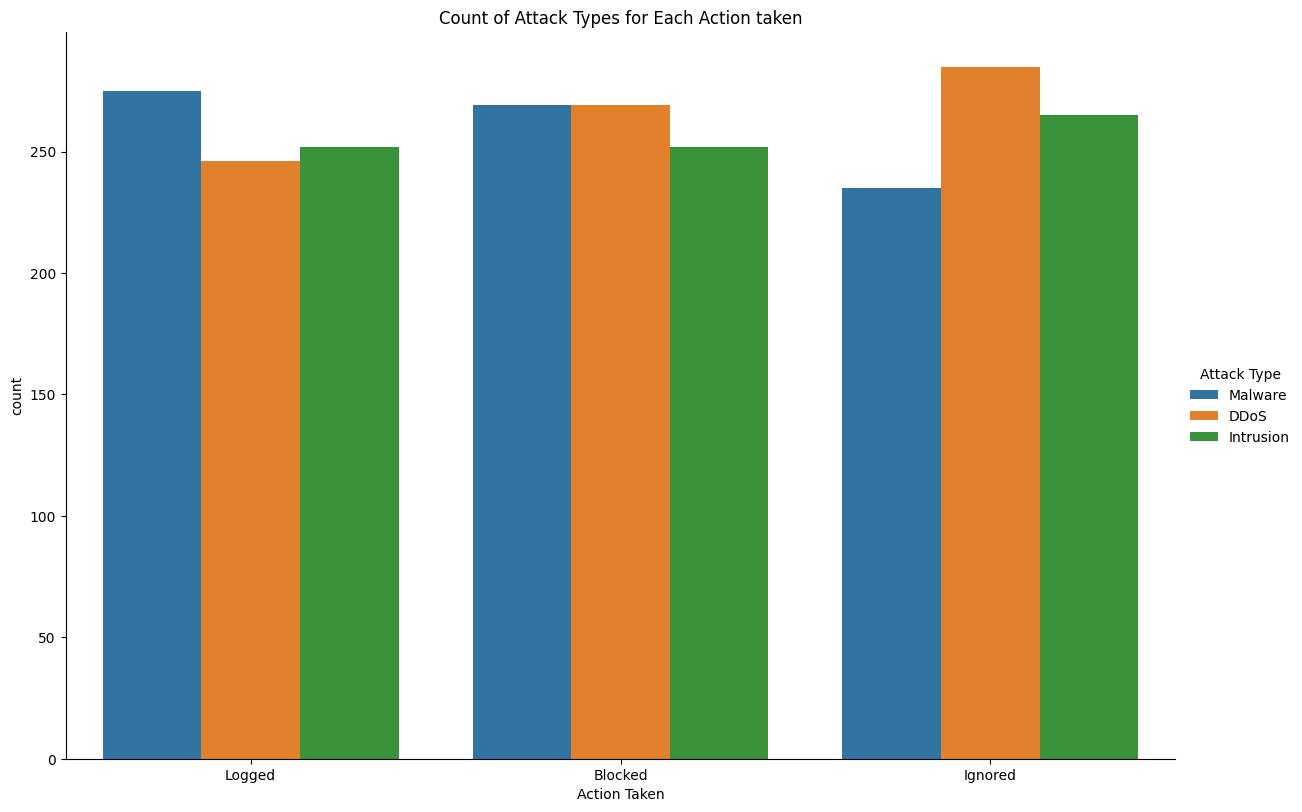

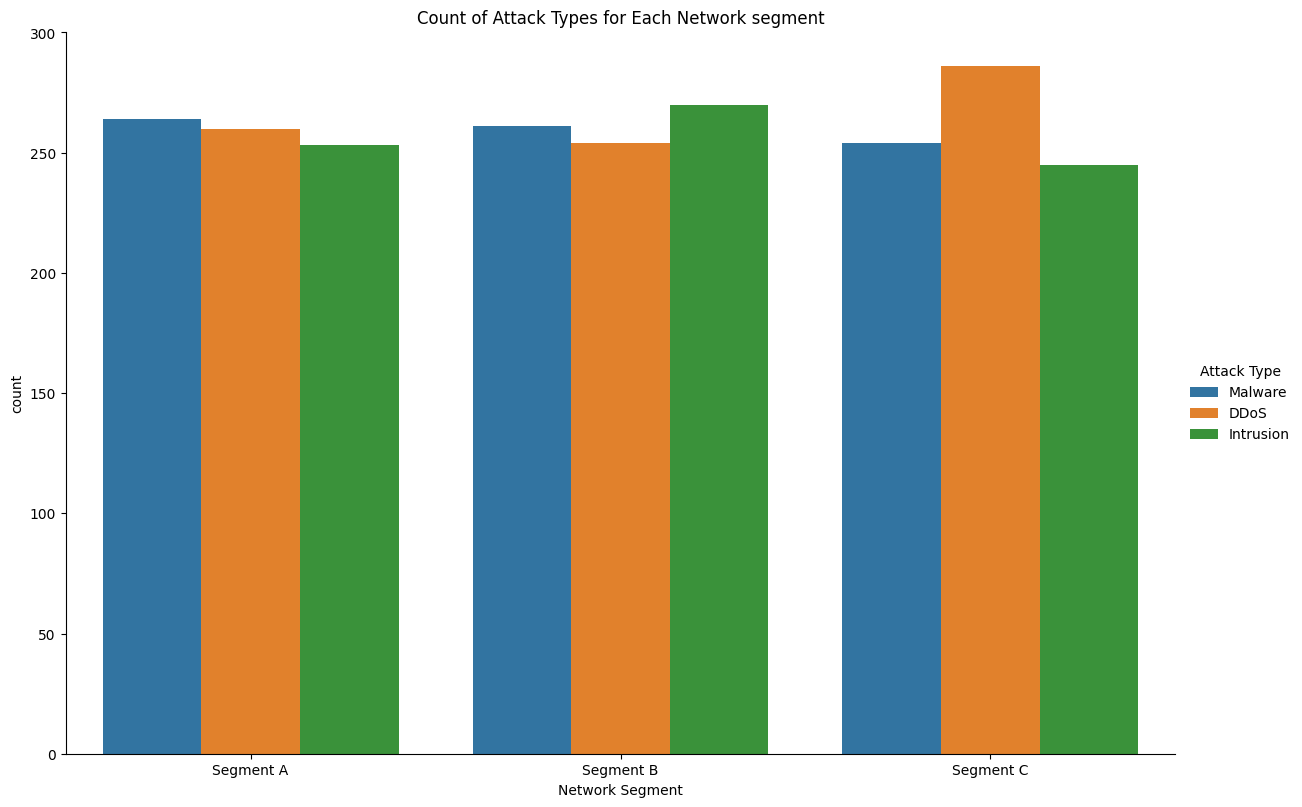

In [ ]:
columns_to_plot = ['Protocol','Attack Signature','Action Taken','Network Segment']
for col in columns_to_plot:
    sns.catplot(data=data, x=col, hue='Attack Type', kind='count', height=8, aspect=1.5)
    plt.title(f'Count of Attack Types for Each {col.capitalize()}')
    plt.show

warnings.filterwarnings("default")

## Data Visualization


In [ ]:
data['Payload Data'].dtype

dtype('O')

In [ ]:
# Convert data to a string

text = str(data['Payload Data'])

In [ ]:
+

## Bar Chart

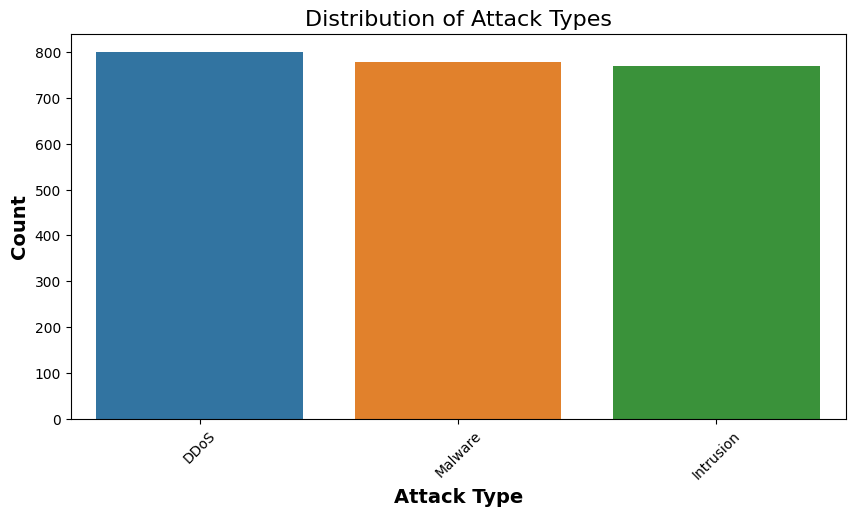

DDoS         800
Malware      779
Intrusion    769
Name: Attack Type, dtype: int64


In [ ]:
# Visualize the distribution of attack types

attack_counts = data['Attack Type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=attack_counts.index , y=attack_counts)

plt.xlabel('Attack Type',fontsize=14, fontweight='bold')
plt.ylabel('Count',fontsize=14, fontweight='bold')
plt.title('Distribution of Attack Types', fontsize=16)

plt.xticks(rotation=45)
plt.show()

print(attack_counts)

## Pie Charts

In [ ]:
data['Protocol'].value_counts()

ICMP    800
UDP     784
TCP     764
Name: Protocol, dtype: int64

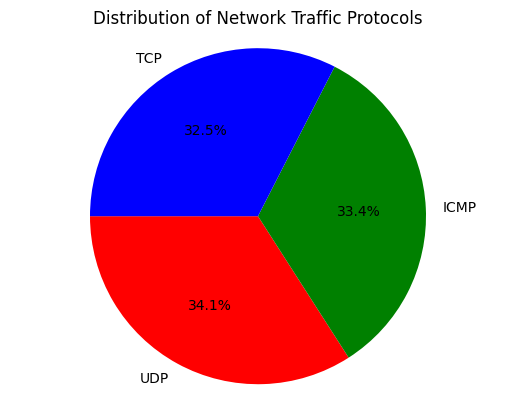

In [ ]:
labels = ['UDP', 'ICMP', 'TCP']
sizes = data['Protocol'].value_counts()  # Proportional sizes of each category
colors = ['red', 'green', 'blue']  # Color for each category segment
explode = (0.1, 0, 0)  # Explode a slice if needed (0 means no explosion)


# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors,  autopct='%1.1f%%', startangle=180)

plt.axis('equal')
plt.title('Distribution of Network Traffic Protocols')
plt.show()

In [ ]:
data['Traffic Type'].value_counts()

HTTP    805
DNS     790
FTP     753
Name: Traffic Type, dtype: int64

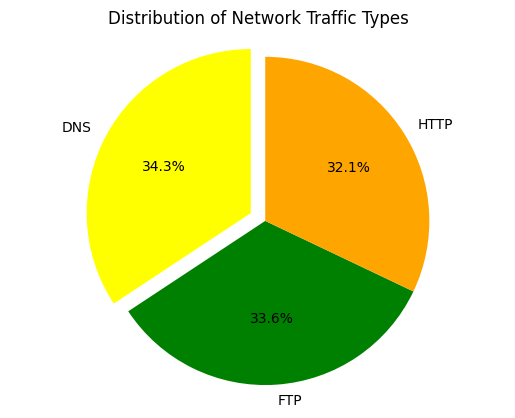

In [ ]:
# Data for the pie chart

labels =['DNS','FTP','HTTP']
sizes = data['Traffic Type'].value_counts()
colors = ['yellow', 'green', 'orange']
explode = (0.1, 0, 0)

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%2.1f%%', startangle=90)

plt.axis('equal')
plt.title('Distribution of Network Traffic Types')

plt.show()

In [ ]:
data['Packet Type'].value_counts()

Control    1184
Data       1164
Name: Packet Type, dtype: int64

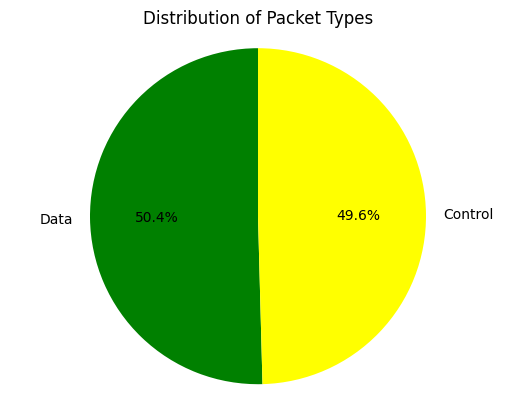

In [ ]:
# Data for the pie chart
labels =['Data','Control']
sizes = data['Packet Type'].value_counts()
colors = ['green', 'yellow']
explode = (0, 0)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Packet Types')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



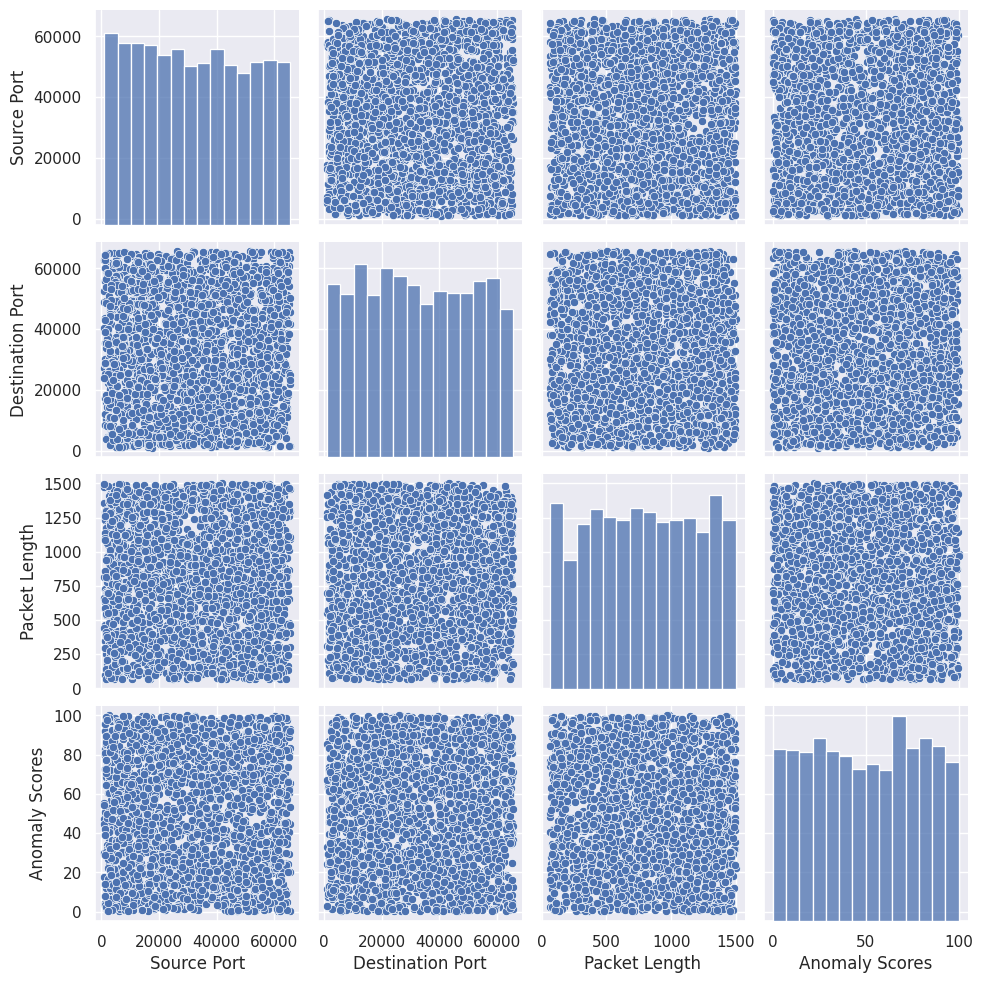

In [ ]:
#Scatter plots of all columns
sns.set()
cols = ['Source Port','Destination Port','Packet Length','Anomaly Scores']
sns.pairplot(data[cols], size = 2.5)
plt.show()

<Axes: >

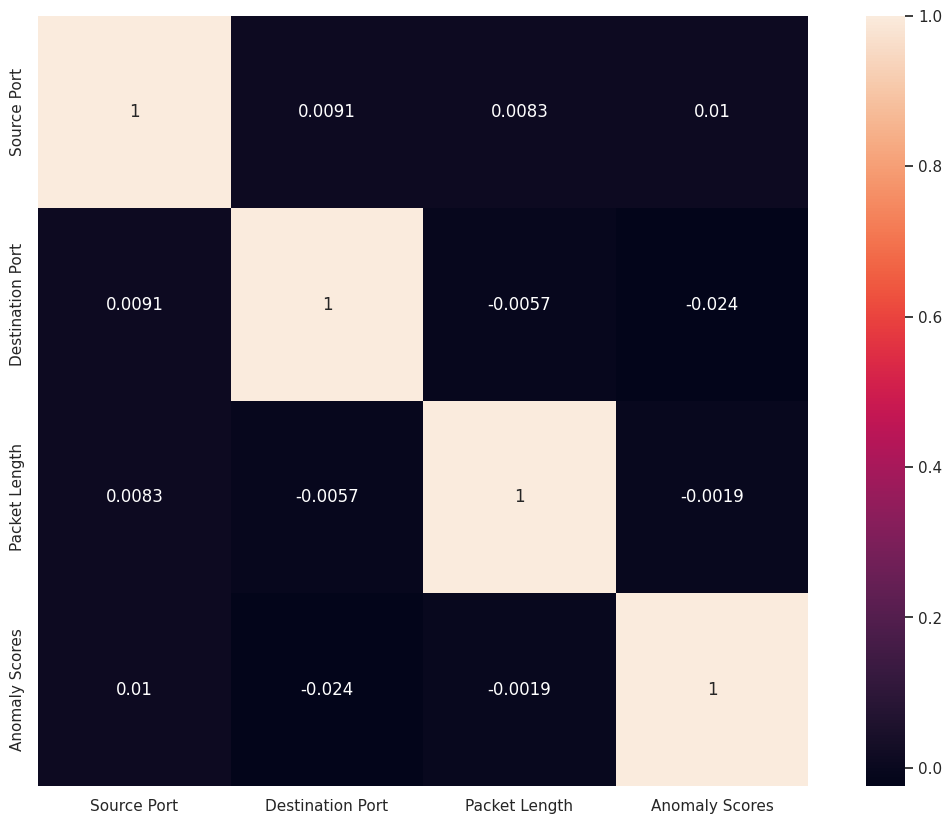

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)